# TASK2:

### Annotate 6 to 7 images (you can use attached cat_dog.zip for this and annotate cats and dogs using rectangles) using via annotator (find on internet or use the provided one in attachments), save the project, it will save all the annotations to a json file. Now your task is to create a notebook which load data from that json, load the information of bounding boxes along with label names and display / draw those on their respective images.

In [1]:
import os
os.getcwd()
os.chdir(r"C:\Users\uzair\Desktop\Computer Vision\cat_dog")
os.getcwd()

'C:\\Users\\uzair\\Desktop\\Computer Vision\\cat_dog'

In [2]:
import pandas as pd
import numpy as np

In [4]:
cats_dog_df = pd.read_json('cat_dog_annotations.json')
cats_dog_df

,_via_settings,_via_img_metadata,_via_attributes
ui,"{'annotation_editor_height': 25, 'annotation_e...",NaN,NaN
core,"{'buffer_size': 18, 'filepath': {}, 'default_f...",NaN,NaN
project,{'name': 'via_project_18Oct2022_11h49m'},NaN,NaN
1.jpeg45602,NaN,"{'filename': '1.jpeg', 'size': 45602, 'regions...",NaN
2.jpeg4669,NaN,"{'filename': '2.jpeg', 'size': 4669, 'regions'...",NaN
3.jpeg6828,NaN,"{'filename': '3.jpeg', 'size': 6828, 'regions'...",NaN
4.jpeg198685,NaN,"{'filename': '4.jpeg', 'size': 198685, 'region...",NaN
5.jpeg54509,NaN,"{'filename': '5.jpeg', 'size': 54509, 'regions...",NaN
6.jpeg60092,NaN,"{'filename': '6.jpeg', 'size': 60092, 'regions...",NaN
7.jpeg394361,NaN,"{'filename': '7.jpeg', 'size': 394361, 'region...",NaN


In [3]:
import cv2
import json
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

with open('cat_dog_annotations.json') as f:
    data = json.load(f)


data['_via_img_metadata']
# data['_via_img_metadata']['1.jpeg45602']['filename']
# data['_via_img_metadata']['1.jpeg45602']['regions']
# list(data['_via_img_metadata']['1.jpeg45602']['regions'][0]['region_attributes']['class'].keys())[0]


{'1.jpeg45602': {'filename': '1.jpeg',
  'size': 45602,
  'regions': [{'shape_attributes': {'name': 'rect',
     'x': 284,
     'y': 27,
     'width': 365,
     'height': 478},
    'region_attributes': {'class': {'dog': True}}}],
  'file_attributes': {}},
 '2.jpeg4669': {'filename': '2.jpeg',
  'size': 4669,
  'regions': [{'shape_attributes': {'name': 'rect',
     'x': 6,
     'y': 39,
     'width': 150,
     'height': 107},
    'region_attributes': {'class': {'dog': True}}},
   {'shape_attributes': {'name': 'rect',
     'x': 160,
     'y': 77,
     'width': 99,
     'height': 65},
    'region_attributes': {'class': {'cat': True}}}],
  'file_attributes': {}},
 '3.jpeg6828': {'filename': '3.jpeg',
  'size': 6828,
  'regions': [{'shape_attributes': {'name': 'rect',
     'x': 57,
     'y': 3,
     'width': 186,
     'height': 141},
    'region_attributes': {'class': {'cat': True}}}],
  'file_attributes': {}},
 '4.jpeg198685': {'filename': '4.jpeg',
  'size': 198685,
  'regions': [{'shape_

In [4]:
print(f'Length of given Json File: {len(data.items())}')
data.keys()

Length of given Json File: 3


dict_keys(['_via_settings', '_via_img_metadata', '_via_attributes'])

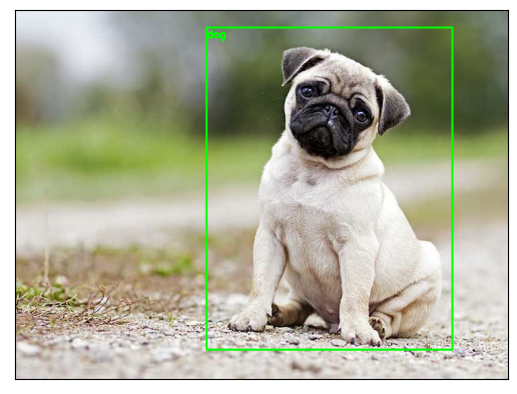

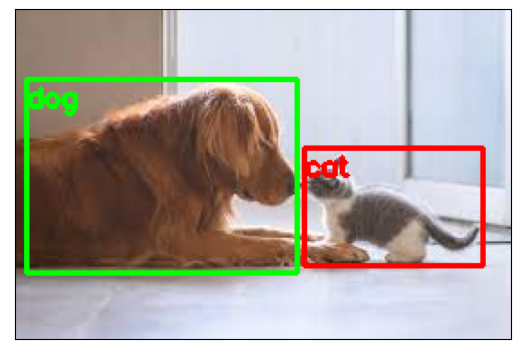

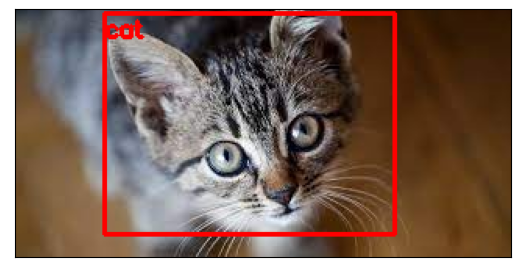

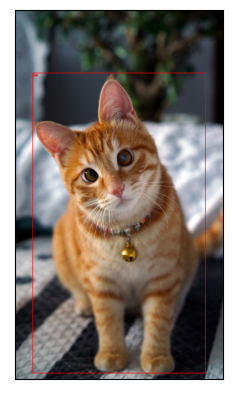

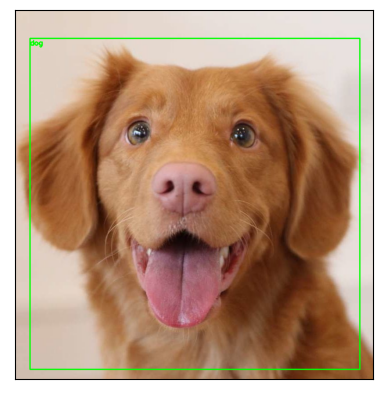

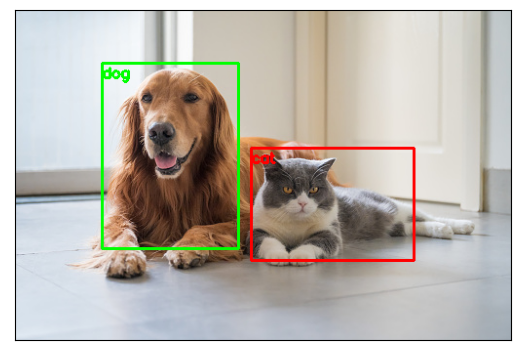

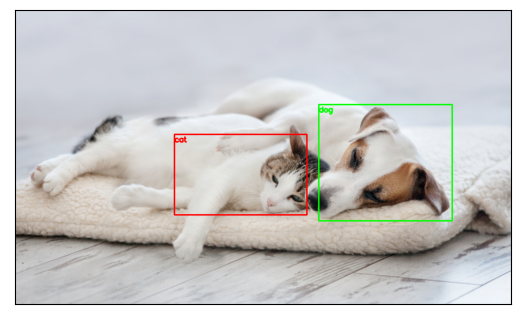

In [10]:
# Loop through the image metadata
for key, values in data.items():
    if key == '_via_img_metadata':
        img_metadata = values
        for img_key, img_values in img_metadata.items():
            # Get the filename and regions for the image
            filename = img_values['filename']
            regions = img_values['regions']
            
            # Open the image
            #image = Image.open(filename)    # With PIL Library
            image = cv2.imread(filename)
            
            # Convert image from BGR to RGB for matplotlib
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            
            # Create a drawing object
            # draw = ImageDraw.Draw(image)    # With PIL Library
            
            # Loop through the regions and draw bounding boxes
            for region in regions:
                shape_attributes = region['shape_attributes']
                region_attributes = region['region_attributes']
                class_name = list(region_attributes['class'].keys())[0]
                
                x, y = shape_attributes['x'], shape_attributes['y']
                width, height = shape_attributes['width'], shape_attributes['height']
                
                # Set color based on class name
                color = (0, 255, 0) if class_name == 'dog' else (255, 0, 0) # Green for dogs and Red for cats
                
                # Set thickness
                thickness = 2
                
                # Draw the bounding box
                # draw.rectangle((x, y, x+width, y+height), outline=color, width=3)    # With PIL Library
                cv2.rectangle(image_rgb, (x, y), (x+width, y+height), color, thickness)
                
                # Set font size and create font object
                #font_size = 20
                #font = ImageFont.truetype('arial.ttf', size=font_size)    # With PIL Library
                
                # Put class name on bounding box
                #draw.text((x+2, y+2), class_name, font=font, fill=color)
                cv2.putText(image_rgb, class_name, (x, y+15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, thickness)
                
            # Show the image
            plt.imshow(image_rgb)
            plt.xticks([])
            plt.yticks([])
            plt.show()

In [154]:
# img_metadata = data['_via_img_metadata']
# regions_data = []
# for img_key in img_metadata:
#     img_data = img_metadata[img_key]
#     filename = img_data['filename']
#     img = cv2.imread(filename)
#     img_h, img_w = img.shape[:2]
#     regions = img_data['regions']
#     for region in regions:
#         class_name = list(region['region_attributes']['class'].keys())[0]
#         boundary_box = region['shape_attributes']
#         x = boundary_box['x']
#         y = boundary_box['y']
#         w = boundary_box['width']
#         h = boundary_box['height']
#         x1 = x
#         y1 = y
#         x2 = x + w
#         y2 = y + h
#         regions_data.append({
#             'filename': filename,
#             'class_name': class_name,
#             'boundary_box': [x1, y1, x2, y2],
#             'img_w': img_w,
#             'img_h': img_h
#         })

In [ ]:
# for region_data in regions_data:
#     filename = region_data['filename']
#     class_name = region_data['class_name']
#     bbox = region_data['boundary_box']
#     img_w = region_data['img_w']
#     img_h = region_data['img_h']
#     img = cv2.imread(filename)
#     color = (0, 255, 0) if class_name == 'dog' else (0, 0, 255) # Green for dogs and Red for cats
#     thickness = 2
#     x1, y1, x2, y2 = bbox
#     cv2.rectangle(img, (x1, y1), (x2, y2), color, thickness)
#     cv2.putText(img, class_name, (x1, y1+15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, thickness)
    
#     # convert image from BGR to RGB for matplotlib
#     img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
#     # plot the image
#     plt.imshow(img_rgb)
#     plt.title(class_name)
#     plt.xticks([])
#     plt.yticks([])
#     plt.show()
    
#     # show in new window
#     cv2.imshow('image', img)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()
